20210130l_m2km.fits

collecting data
 - time: 2.2528
 - data shape: 6000x246x329
collecting bias
 - time: 0.4096
 - bias image shape: 246x329
data reduction
 - time: 4.5532
 - pupil image shape: 226x226
cross correlating
 - time: 0.2176
 - cross-corr image shape: 452x452
creating auto-corr pupil image
 - time: 0.0641
 - auto-corr pupil image shape: 452x452
creating gammas
 - time: 1.5872
 - 50 monochromatic turbulence layers from 0 to 50 km
calculating threshold
 - time: 0.3161
 - threshold: 0.0021158887584387586
finding peaks
 - time: 0.0120
 - 5 peaks found

Начальные параметры:
[[  0.          0.          1.7547427   2.       ]
 [ -4.977876   -2.2123895   2.489979   10.       ]
 [ -6.0840707  -5.8075223   2.3580866  10.       ]
 [-11.061947  -10.508849    1.578558   10.       ]
 [-15.763274  -15.486726    2.465848   10.       ]]
 - total Cn2: 1.0647214e-12
 - seeing, 650 nm: 1.24
approxing
 - time: 9.9400
   Vx, m/s    Vy, m/s          Cn2         z, m
  0.070332   0.080891 1.081859

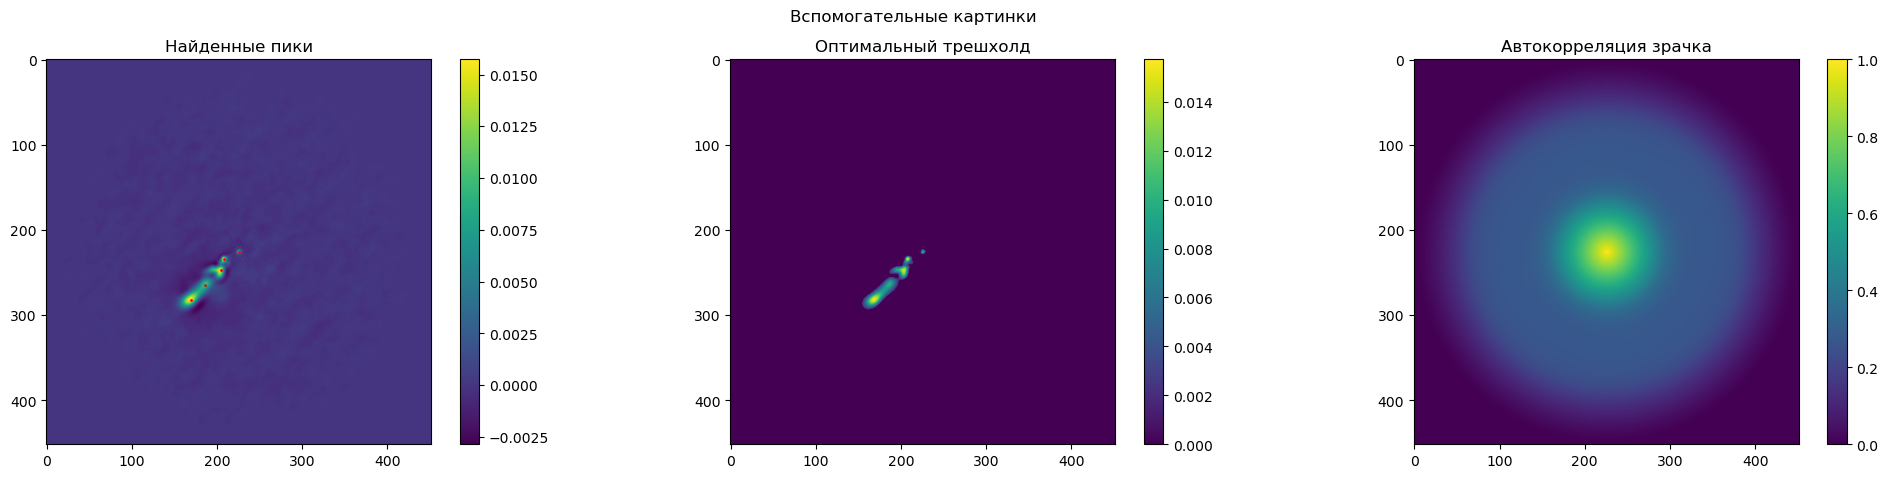

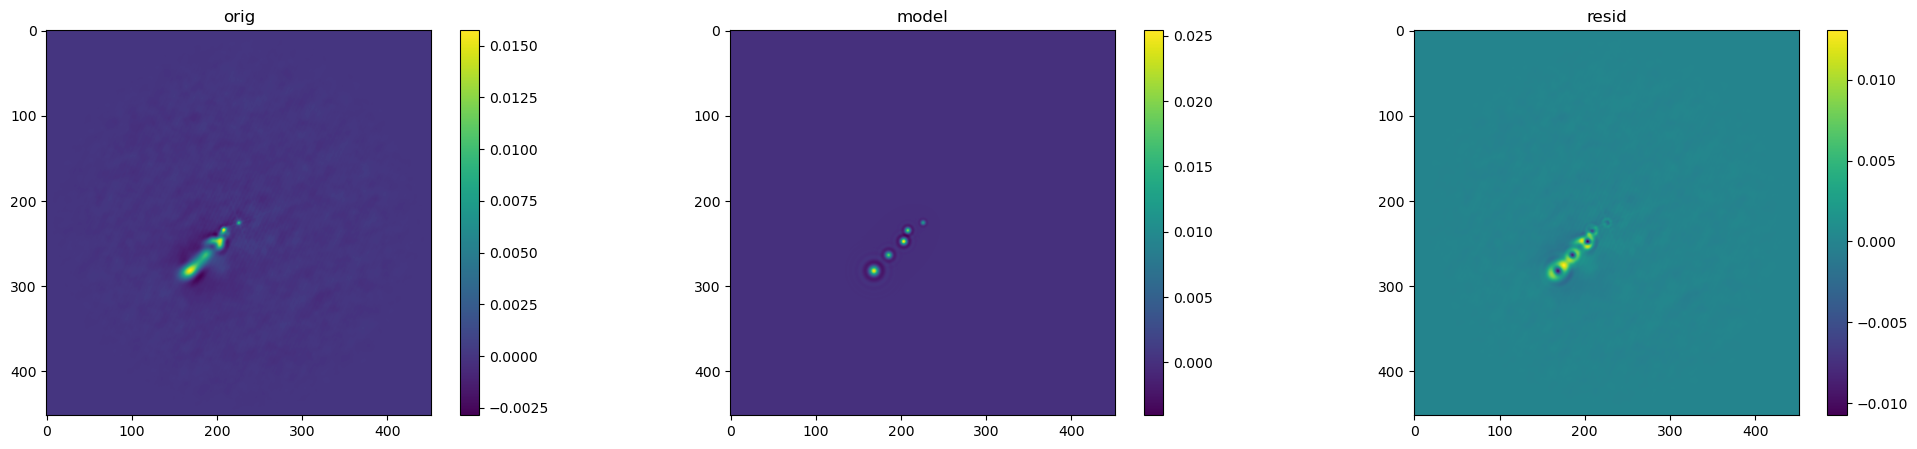

In [1]:
from main import processDomecam

file = '20210130l_m2km.fits'
file_bias = 'bias20210130.fits'
data_dir = 'D:/astro/domecam'

'''
сделать ли распределение по высотам у теор. гамм одинаковым для всех реализаций или сделать его настраиваемым?
ну и как лучше сделать это распределение -  если геом.спейс то как задать само распределение и крайневые значения 

можно ли заранее при создании гамм учесть домножение cjk? чтобы каждый раз не домножать внутри аппроксимации
Ихображение кросс-корреляции можно поделить на cjk, чтобы в аппроксимации его не учитывать, так можно? (вроде у Матвея так было)

проверить гаммы на адекватность рез-ов
'''


latency = [4] # задержка для кросс-корреляции, [кадр]
conjugated_distance = 2 # сопряженное расстояние, [километр]
D = 2.5 # диаметр телескопа, [метр]
spectrum = 'mono' # тип излучения

# для монохроматического излучения, нужно указать длину волны света
lambda_ = 650*1e-9 # длина наблюдаемой волны света, [метр]

# для полихроматического излучения нужны кривые фильтра, детектора и звезды
file_filter = 'KC19_d16t4_Safonov.xls'
file_ccd = 'ccd_prosilica2.crv'
file_star = 'a05.sp'

processDomecam(file=file, file_bias=file_bias, data_dir=data_dir, 
               D=D, conjugated_distance=conjugated_distance, latency=latency,
               spectrum=spectrum, lambda_=lambda_, file_filter=file_filter, file_ccd=file_ccd, file_star=file_star)